In [1]:
!pip freeze |egrep "pandas|matplotlib|numpy|scipy"

matplotlib==3.7.5
matplotlib-inline==0.1.7
numpy==1.24.4
pandas==1.5.3
scipy==1.10.1


gitpod /workspace/boilerplate-sea-level-predictor (main) $ pip freeze |egrep "pandas|matplotlib|numpy|scipy"\
matplotlib==3.7.5  #  installing this one too, modifying the empty ver at requirements.txt\
numpy==1.24.4\
pandas==1.5.3\
scipy==1.10.1\     

In [2]:
!cat requirements.txt

numpy==1.24.4
pandas==1.5.3
scipy==1.10.1
matplotlib==3.7.5

In [3]:
!pip install -r requirements.txt --quiet

You should consider upgrading via the '/home/milos/Documents/Cursos/freecodecamp/boilerplate-sea-level-predictor/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip freeze |egrep "pandas|matplotlib|numpy|scipy"

matplotlib==3.7.5
matplotlib-inline==0.1.7
numpy==1.24.4
pandas==1.5.3
scipy==1.10.1


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [6]:
# Read data from file
#Use Pandas to import the data from epa-sea-level.csv

df_esl = pd.read_csv('epa-sea-level.csv')

df_esl.head(3)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN


In [7]:
# Create scatter plot
#Use matplotlib to create a scatter plot using the Year column as the x-axis
# and the CSIRO Adjusted Sea Level column as the y-axis.

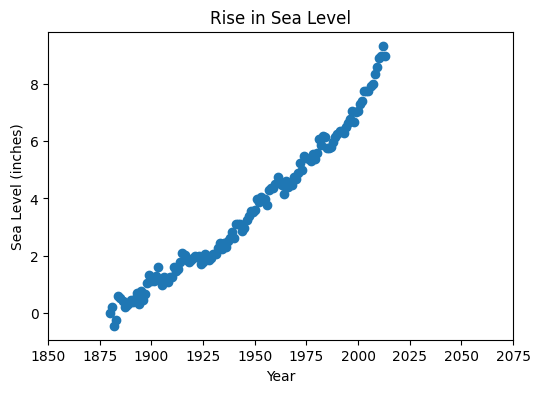

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
x = df_esl["Year"].to_numpy()
y = df_esl["CSIRO Adjusted Sea Level"].to_numpy()
ax.scatter(x, y)
ax.set(title='Rise in Sea Level', xlabel='Year', ylabel='Sea Level (inches)',
        xticks=[1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
plt.show()

In [9]:
x[:5] , y[:5]

(array([1880, 1881, 1882, 1883, 1884]),
 array([ 0.        ,  0.22047244, -0.44094488, -0.23228346,  0.59055118]))

In [10]:
# obtaining linear regression parameters

linearreg = linregress(x, y)
linearreg.slope , linearreg.intercept

(0.06304458401213481, -119.0659419677398)

In [11]:
linearreg.slope * 1880 + linearreg.intercept

-0.5421240249263661

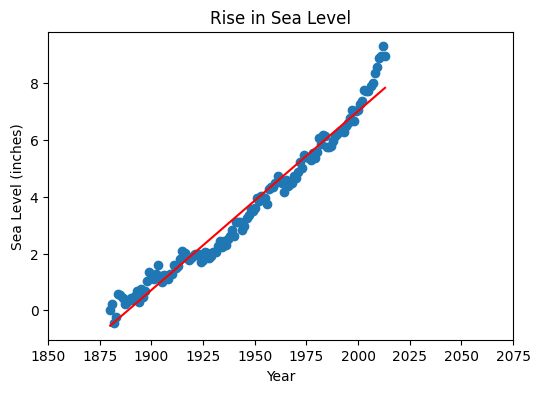

In [12]:
# initial parameters
fig, ax = plt.subplots(figsize=(6,4))
x = df_esl["Year"].to_numpy()
y = df_esl["CSIRO Adjusted Sea Level"].to_numpy()

# linear regression prediction
y_pred = x * linearreg.slope + linearreg.intercept


ax.scatter(x, y)
ax.plot(x , y_pred , 'r' , label='Linear Regression')

ax.set(title='Rise in Sea Level', xlabel='Year', ylabel='Sea Level (inches)',
        xticks=[1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
plt.show()


In [13]:
# Now we have to extend the prediction line up to year 2050

In [14]:
x[-5:] , y_pred[-5:]

(array([2009, 2010, 2011, 2012, 2013]),
 array([7.59062731, 7.6536719 , 7.71671648, 7.77976106, 7.84280565]))

In [15]:
x[-1]+1

2014

In [16]:
y_2014to2050 = []
for i,yr in enumerate(range( x[-1]+1 ,2051 )):
    y_2014to2050.append(yr * linearreg.slope + linearreg.intercept)
    # print(i,yr)

y_2014to2050[:5] , y_2014to2050[-5:]

([7.905850232699706,
  7.968894816711838,
  8.03193940072397,
  8.094983984736103,
  8.158028568748236],
 [9.923276921088018,
  9.986321505100136,
  10.049366089112283,
  10.11241067312443,
  10.175455257136548])

In [17]:
# extending prediction to year 2050

# linear regression parametters
linearreg = linregress(x, y)
# obtaining pred line to plot it
y_pred = x * linearreg.slope + linearreg.intercept
# prediction of sea level from 2014 to 2050
y_2014to2050 = []
for i,yr in enumerate(range( x[-1]+1 ,2051 )):
    y_2014to2050.append(yr * linearreg.slope + linearreg.intercept)
    # print(i,yr)

# extending pred line to year 2050 (year by year), and also its correspondind x array
y_pred2050 = np.append(y_pred, y_2014to2050)
x_2050 = np.append(x ,   range( x[-1]+1 ,2051 ) )

x_2050[-39:]  ,  y_pred2050[-39:]

(array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
        2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033,
        2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044,
        2045, 2046, 2047, 2048, 2049, 2050]),
 array([ 7.77976106,  7.84280565,  7.90585023,  7.96889482,  8.0319394 ,
         8.09498398,  8.15802857,  8.22107315,  8.28411774,  8.34716232,
         8.4102069 ,  8.47325149,  8.53629607,  8.59934066,  8.66238524,
         8.72542982,  8.78847441,  8.85151899,  8.91456358,  8.97760816,
         9.04065274,  9.10369733,  9.16674191,  9.2297865 ,  9.29283108,
         9.35587566,  9.41892025,  9.48196483,  9.54500942,  9.608054  ,
         9.67109859,  9.73414317,  9.79718775,  9.86023234,  9.92327692,
         9.98632151, 10.04936609, 10.11241067, 10.17545526]))

        expected = [-0.5421240249263661, -0.4790794409142336, -0.41603485690208686, -0.3529902728899543, -0.2899456888778218, -0.22690110486568926, -0.16385652085355673, -0.1008119368414242, -0.037767352829277456, 0.025277231182855076, 0.08832181519498761, 0.15136639920712014, 0.21441098321925267, 0.2774555672313852, 0.34050015124351773, 0.4035447352556645, 0.466589319267797, 0.5296339032799295, 0.5926784872920621, 0.6557230713041946, 0.7187676553163271, 0.7818122393284739, 0.8448568233406064, 0.9079014073527389, 0.9709459913648715, 1.033990575377004, 1.0970351593891365, 1.1600797434012833, 1.2231243274134158, 1.2861689114255483, 1.3492134954376809, 1.4122580794498134, 1.475302663461946, 1.5383472474740927, 1.6013918314862252, 1.6644364154983577, 1.7274809995104903, 1.7905255835226228, 1.8535701675347553, 1.9166147515468879, 1.9796593355590346, 2.042703919571167, 2.1057485035832997, 2.168793087595432, 2.2318376716075647, 2.2948822556196973, 2.357926839631844, 2.4209714236439766, 2.484016007656109, 2.5470605916682416, 2.610105175680374, 2.6731497596925067, 2.7361943437046534, 2.799238927716786, 2.8622835117289185, 2.925328095741051, 2.9883726797531835, 3.051417263765316, 3.1144618477774486, 3.1775064317895954, 3.240551015801728, 3.3035955998138604, 3.366640183825993, 3.4296847678381255, 3.492729351850258, 3.5557739358624048, 3.6188185198745373, 3.68186310388667, 3.7449076878988024, 3.807952271910935, 3.8709968559230674, 3.934041439935214, 3.9970860239473467, 4.060130607959479, 4.123175191971612, 4.186219775983744, 4.249264359995877, 4.312308944008024, 4.375353528020156, 4.438398112032289, 4.501442696044421, 4.564487280056554, 4.627531864068686, 4.690576448080819, 4.7536210320929655, 4.816665616105098, 4.879710200117231, 4.942754784129363, 5.005799368141496, 5.068843952153628, 5.131888536165775, 5.194933120177907, 5.25797770419004, 5.3210222882021725, 5.384066872214305, 5.4471114562264376, 5.510156040238584, 5.573200624250717, 5.636245208262849, 5.699289792274982, 5.762334376287114, 5.825378960299247, 5.8884235443113795, 5.951468128323526, 6.014512712335659, 6.077557296347791, 6.140601880359924, 6.203646464372056, 6.266691048384189, 6.329735632396336, 6.392780216408468, 6.455824800420601, 6.518869384432733, 6.581913968444866, 6.644958552456998, 6.708003136469145, 6.771047720481278, 6.83409230449341, 6.897136888505543, 6.960181472517675, 7.023226056529808, 7.086270640541954, 7.149315224554087, 7.2123598085662195, 7.275404392578352, 7.338448976590485, 7.401493560602617, 7.46453814461475, 7.527582728626896, 7.590627312639029, 7.653671896651161, 7.716716480663294, 7.7797610646754265, 7.842805648687559, 7.905850232699706, 7.968894816711838, 8.03193940072397, 8.094983984736103, 8.158028568748236, 8.221073152760368, 8.284117736772515, 8.347162320784648, 8.41020690479678, 8.473251488808913, 8.536296072821045, 8.599340656833178, 8.66238524084531, 8.725429824857457, 8.78847440886959, 8.851518992881722, 8.914563576893855, 8.977608160905987, 9.040652744918134, 9.103697328930252, 9.166741912942399, 9.229786496954517, 9.292831080966664, 9.35587566497881, 9.41892024899093, 9.481964833003076, 9.545009417015194, 9.608054001027341, 9.671098585039488, 9.734143169051606, 9.797187753063753, 9.860232337075871, 9.923276921088018, 9.986321505100136, 10.049366089112283, 10.11241067312443, 10.175455257136548]



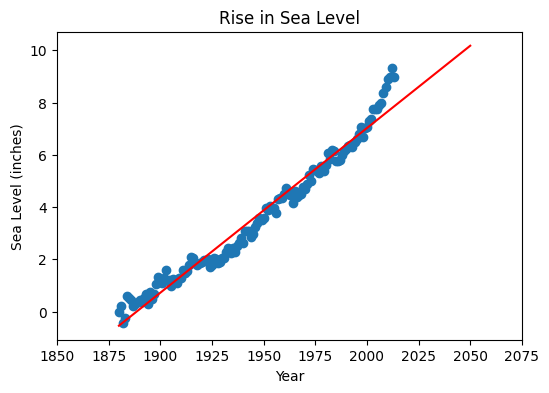

In [18]:
# replotting with the pred arrays at the pred line extended to 2050

# initial parameters
fig, ax = plt.subplots(figsize=(6,4))
x = df_esl["Year"].to_numpy()
y = df_esl["CSIRO Adjusted Sea Level"].to_numpy()

# linear regression parametters
linearreg = linregress(x, y)
# obtaining pred line to plot it
y_pred = x * linearreg.slope + linearreg.intercept
# prediction of sea level from 2014 to 2050
y_2014to2050 = []
for i,yr in enumerate(range( x[-1]+1 ,2051 )):
    y_2014to2050.append(yr * linearreg.slope + linearreg.intercept)
    # print(i,yr)

# extending pred line to year 2050 (year by year), and also its correspondind x array
y_pred2050 = np.append(y_pred, y_2014to2050)
x_2050 = np.append(x ,   range( x[-1]+1 ,2051 ) )

# plotting
ax.scatter(x, y)
ax.plot(x_2050 , y_pred2050 , 'r' , label='Linear Regression')

ax.set(title='Rise in Sea Level', xlabel='Year', ylabel='Sea Level (inches)',
        xticks=[1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
plt.show()


In [19]:
# full code lines to go into the function

[Text(0.5, 1.0, 'Rise in Sea Level'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Sea Level (inches)'),

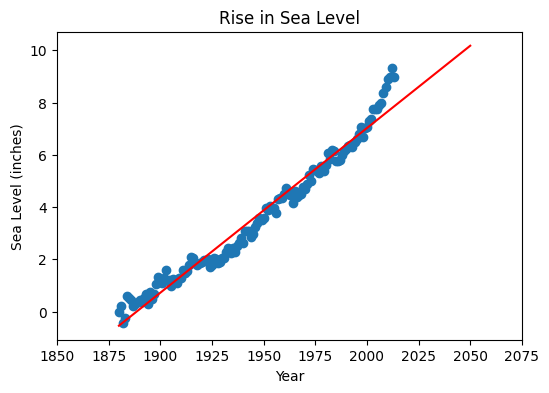

In [20]:
# Create first line of best fit
# Use the linregress function from scipy.stats to get the slope and y-intercept
# of the line of best fit. Plot the line of best fit over the top of the scatter plot.
# Make the line go through the year 2050 to predict the sea level rise in 2050.

# info >  https://docs.scipy.org/doc/scipy-1.13.1/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress

# initial parameters
fig, ax = plt.subplots(figsize=(6,4))
x = df_esl["Year"].to_numpy()
y = df_esl["CSIRO Adjusted Sea Level"].to_numpy()

# linear regression parametters
linearreg = linregress(x, y)
# obtaining pred line to plot it
y_pred = x * linearreg.slope + linearreg.intercept
# prediction of sea level from 2014 to 2050
y_2014to2050 = []
for i,yr in enumerate(range( x[-1]+1 ,2051 )):
    y_2014to2050.append(yr * linearreg.slope + linearreg.intercept)
    # print(i,yr)

# extending pred line to year 2050 (year by year), and also its correspondind x array
y_pred2050 = np.append(y_pred, y_2014to2050)
x_2050 = np.append(x ,   range( x[-1]+1 ,2051 ) )

# plotting
ax.scatter(x, y)
ax.plot(x_2050 , y_pred2050 , 'r' , label='Linear Regression')

ax.set(title='Rise in Sea Level', xlabel='Year', ylabel='Sea Level (inches)',
        xticks=[1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
# plt.show()

In [21]:
    # Create second line of best fit

In [22]:
#Index of np array x where year 2000 begins
np.where(x>=2000)[0][0]

120

In [23]:
#new x_since_2000 until the most recent date in x, which is 2013
x_since_2000 = x[ np.where(x>=2000)[0][0] : ]

x_since_2000

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013])

In [24]:
#new y_from_2000 until the most recent date in x, which is 2013
#using the same indexes as in the previous cell

y_since_2000 = y[ np.where(x>=2000)[0][0] : ]

y_since_2000

array([7.06299212, 7.28740157, 7.38188976, 7.75984251, 7.74015747,
       7.74409448, 7.91732283, 7.99606298, 8.35039369, 8.58661416,
       8.90157479, 8.96456692, 9.32677164, 8.98031495])

In [25]:
# getting new prediction lin reg params
linearreg_since_2000 = linregress(x_since_2000, y_since_2000)

linearreg_since_2000.slope , linearreg_since_2000.intercept


(0.1664272733318682, -325.7934668059649)

In [26]:
# predicting 2000 to 2050

y_pred_2000to2050 = []
for i,yr in enumerate(range( 2000 ,2051 )):
    y_pred_2000to2050.append(yr * linearreg_since_2000.slope + linearreg_since_2000.intercept)

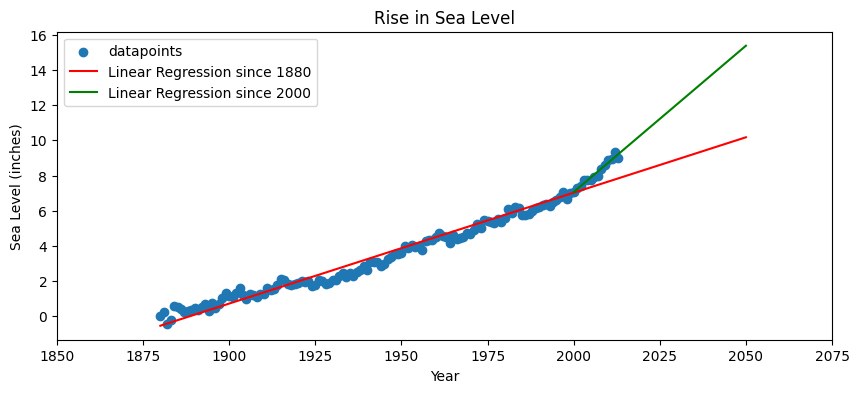

In [27]:
# replotting

# initial parameters
fig, ax = plt.subplots(figsize=(10,4))
x = df_esl["Year"].to_numpy()
y = df_esl["CSIRO Adjusted Sea Level"].to_numpy()

# 2nd pred line subset
x_since_2000 = x[ np.where(x>=2000)[0][0] : ]
y_since_2000 = y[ np.where(x>=2000)[0][0] : ]

# getting new prediction lin reg params
linearreg_since_2000 = linregress(x_since_2000, y_since_2000)

# predicting 2000 to 2050

y_pred_2000to2050 = []
for i,yr in enumerate(range( 2000 ,2051 )):
    y_pred_2000to2050.append(yr * linearreg_since_2000.slope + linearreg_since_2000.intercept)


ax.scatter(x, y )
ax.plot(x_2050 , y_pred2050 , 'r' )
ax.plot(range( 2000 ,2051 ) , y_pred_2000to2050 , 'g' )  #this is the 2nd line plot

ax.legend(['datapoints', 'Linear Regression since 1880', 'Linear Regression since 2000'])

ax.set(title='Rise in Sea Level', xlabel='Year', ylabel='Sea Level (inches)',
        xticks=[1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
plt.show()

In [28]:
# full code lines to go into the function

In [29]:
# Create second line of best fit
# Plot a new line of best fit just using the data from year 2000 through the most recent year
# in the dataset. Make the line also go through the year 2050 to predict the sea level rise
# in 2050 if the rate of rise continues as it has since the year 2000.

# 2nd pred line subset
x_since_2000 = x[ np.where(x>=2000)[0][0] : ]
y_since_2000 = y[ np.where(x>=2000)[0][0] : ]

# getting new prediction lin reg params
linearreg_since_2000 = linregress(x_since_2000, y_since_2000)

# predicting 2000 to 2050

y_pred_2000to2050 = []
for i,yr in enumerate(range( 2000 ,2051 )):
    y_pred_2000to2050.append(yr * linearreg_since_2000.slope + linearreg_since_2000.intercept)

ax.plot( range( 2000 ,2051 ) , y_pred_2000to2050 , 'g' )

ax.legend(['datapoints', 'Linear Regression since 1880', 'Linear Regression since 2000'])
